In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import tensorflow as tf
import tensorflow_datasets as tfds

# 1- Tweets dataset

In [2]:
df1 = pd.read_csv('https://query.data.world/s/fao4cqhvwdj4t457qs2oircqkk43ve')

In [3]:
df1.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


In [4]:
df1 = df1.drop(['tweet_id', 'author'], axis=1)
df1.head()

,sentiment,content
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...


In [5]:
df1.shape

(40000, 2)

In [6]:
df1 = df1.loc[df1['sentiment'].isin(['happiness', 'sadness', 'worry'])]
df1

,sentiment,content
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
5,worry,Re-pinging @ghostridah14: why didn't you go to...
6,sadness,"I should be sleep, but im not! thinking about ..."
7,worry,Hmmm. http://www.djhero.com/ is down
...,...,...
39986,happiness,going to watch boy in the striped pj's hope i ...
39987,happiness,"gave the bikes a thorough wash, degrease it an..."
39988,happiness,"had SUCH and AMAZING time last night, McFly we..."
39994,happiness,Succesfully following Tayla!!


In [7]:
df1['sentiment'] = df1['sentiment'].map(lambda s: [int(s=='happiness'), int(s=='sadness'), int(s=='worry'), 0, 0])

In [8]:
df1

,sentiment,content
1,"[0, 1, 0, 0, 0]",Layin n bed with a headache ughhhh...waitin o...
2,"[0, 1, 0, 0, 0]",Funeral ceremony...gloomy friday...
5,"[0, 0, 1, 0, 0]",Re-pinging @ghostridah14: why didn't you go to...
6,"[0, 1, 0, 0, 0]","I should be sleep, but im not! thinking about ..."
7,"[0, 0, 1, 0, 0]",Hmmm. http://www.djhero.com/ is down
...,...,...
39986,"[1, 0, 0, 0, 0]",going to watch boy in the striped pj's hope i ...
39987,"[1, 0, 0, 0, 0]","gave the bikes a thorough wash, degrease it an..."
39988,"[1, 0, 0, 0, 0]","had SUCH and AMAZING time last night, McFly we..."
39994,"[1, 0, 0, 0, 0]",Succesfully following Tayla!!


In [9]:
# BERT tokenizer do the preprocessing by itself, so usually we don't benefit from standard preprocessing.

In [10]:
df1.dtypes

sentiment    object
content      object
dtype: object

In [11]:
df1.columns = ['target', 'input']

In [12]:
df1=df1.reindex(columns=['input', 'target'])
df1

,input,target
1,Layin n bed with a headache ughhhh...waitin o...,"[0, 1, 0, 0, 0]"
2,Funeral ceremony...gloomy friday...,"[0, 1, 0, 0, 0]"
5,Re-pinging @ghostridah14: why didn't you go to...,"[0, 0, 1, 0, 0]"
6,"I should be sleep, but im not! thinking about ...","[0, 1, 0, 0, 0]"
7,Hmmm. http://www.djhero.com/ is down,"[0, 0, 1, 0, 0]"
...,...,...
39986,going to watch boy in the striped pj's hope i ...,"[1, 0, 0, 0, 0]"
39987,"gave the bikes a thorough wash, degrease it an...","[1, 0, 0, 0, 0]"
39988,"had SUCH and AMAZING time last night, McFly we...","[1, 0, 0, 0, 0]"
39994,Succesfully following Tayla!!,"[1, 0, 0, 0, 0]"


In [13]:
len(df1)

18833

# 2- ISEAR dataset (not used)

In [14]:
df2 = pd.read_csv('https://github.com/bhargav1000/textclassifier/blob/master/original_dataset/ISEAR/DATA.csv?raw=true', header=None)

In [15]:
df2

,0,1
0,joy,[ On days when I feel close to my partner and ...
1,fear,Every time I imagine that someone I love or I ...
2,anger,When I had been obviously unjustly treated and...
3,sadness,When I think about the short time that we live...
4,disgust,At a gathering I found myself involuntarily si...
...,...,...
7647,anger,Two years back someone invited me to be the tu...
7648,sadness,I had taken the responsibility to do something...
7649,disgust,I was at home and I heard a loud sound of spit...
7650,shame,I did not do the homework that the teacher had...


In [16]:
df2.columns = ['target', 'input']
df2=df2.reindex(columns=['input', 'target'])
df2

,input,target
0,[ On days when I feel close to my partner and ...,joy
1,Every time I imagine that someone I love or I ...,fear
2,When I had been obviously unjustly treated and...,anger
3,When I think about the short time that we live...,sadness
4,At a gathering I found myself involuntarily si...,disgust
...,...,...
7647,Two years back someone invited me to be the tu...,anger
7648,I had taken the responsibility to do something...,sadness
7649,I was at home and I heard a loud sound of spit...,disgust
7650,I did not do the homework that the teacher had...,shame


In [17]:
df2['target'].unique()

array(['joy', 'fear', 'anger', 'sadness', 'disgust', 'shame', 'guilt'],
      dtype=object)

In [18]:
df2.loc[df2['target'].isin(['guilt', 'anger'])]

,input,target
2,When I had been obviously unjustly treated and...,anger
6,I feel guilty when when I realize that I consi...,guilt
9,When a car is overtaking another and I am forc...,anger
13,When I think that I do not study enough. Afte...,guilt
16,When one is unjustly accused of something one ...,anger
...,...,...
7637,In the past I used to think that my mother was...,guilt
7640,"In September 1984, I was forced to live with s...",anger
7644,I lied to one of my best friends.,guilt
7647,Two years back someone invited me to be the tu...,anger


In [19]:
df2['target'].value_counts()

shame      1094
sadness    1094
disgust    1094
anger      1094
fear       1093
joy        1092
guilt      1091
Name: target, dtype: int64

In [20]:
df2 = df2.loc[df2['target'].isin(['guilt', 'anger'])]


In [21]:
df2['target'] = df2['target'].map(lambda s: [0, 0, 0, int(s=='guilt'), int(s=='anger'), 0])
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,input,target
2,When I had been obviously unjustly treated and...,"[0, 0, 0, 0, 1, 0]"
6,I feel guilty when when I realize that I consi...,"[0, 0, 0, 1, 0, 0]"
9,When a car is overtaking another and I am forc...,"[0, 0, 0, 0, 1, 0]"
13,When I think that I do not study enough. Afte...,"[0, 0, 0, 1, 0, 0]"
16,When one is unjustly accused of something one ...,"[0, 0, 0, 0, 1, 0]"
...,...,...
7637,In the past I used to think that my mother was...,"[0, 0, 0, 1, 0, 0]"
7640,"In September 1984, I was forced to live with s...","[0, 0, 0, 0, 1, 0]"
7644,I lied to one of my best friends.,"[0, 0, 0, 1, 0, 0]"
7647,Two years back someone invited me to be the tu...,"[0, 0, 0, 0, 1, 0]"


In [22]:
len(df2)

2185

# 3- CoNLL-2010

In [23]:
df3 = pd.read_json('https://github.com/meyersbs/uncertainty/blob/master/uncertainty/data/merged.json?raw=true')

In [24]:
df3.iloc[43345], df3.iloc[43345]['ccue']

(text    To determine whether either or both of these t...
 ccue    {'speculation_hypo_investigation _': ['determi...
 Name: 43345, dtype: object,
 {'speculation_hypo_investigation _': ['determine', 'whether', 'analyzed'],
  'speculation_modal_probable_': ['or']})

In [25]:
df3.loc[df3['ccue'] != {}]

,text,ccue
43,Upon finding the two inspectors interviewing h...,"{'speculation_hypo_doxastic _': ['alleged', 'a..."
49,"'Juan Gelman', (Born in Buenos Aires on the 3r...","{'speculation_modal_probable_': ['possibly'], ..."
58,"In practice, brain tumors are generally consid...",{'speculation_hypo_doxastic _': ['considered']}
61,"Depending on the type, extent, and location of...",{'speculation_modal_probable_': ['may']}
62,"For instance, the first line treatment for men...",{'speculation_modal_probable_': ['may']}
...,...,...
43327,"In addition, extracellular factor(s) released ...",{'speculation_modal_probable_': ['might']}
43332,The importance of these observations in the pa...,{'speculation_hypo_doxastic _': ['thought']}
43334,The mechanism of corticosteroid resistance in ...,{'speculation_hypo_investigation _': ['studied']}
43340,These findings indicate that corticosteroid re...,{'speculation_modal_probable_': ['indicate']}


In [26]:
df3.loc[df3['ccue'] != {}].shape

(7258, 2)

In [27]:
df3 = df3.loc[df3['ccue'] != {}]
df3.columns = ['input', 'target']
df3

,input,target
43,Upon finding the two inspectors interviewing h...,"{'speculation_hypo_doxastic _': ['alleged', 'a..."
49,"'Juan Gelman', (Born in Buenos Aires on the 3r...","{'speculation_modal_probable_': ['possibly'], ..."
58,"In practice, brain tumors are generally consid...",{'speculation_hypo_doxastic _': ['considered']}
61,"Depending on the type, extent, and location of...",{'speculation_modal_probable_': ['may']}
62,"For instance, the first line treatment for men...",{'speculation_modal_probable_': ['may']}
...,...,...
43327,"In addition, extracellular factor(s) released ...",{'speculation_modal_probable_': ['might']}
43332,The importance of these observations in the pa...,{'speculation_hypo_doxastic _': ['thought']}
43334,The mechanism of corticosteroid resistance in ...,{'speculation_hypo_investigation _': ['studied']}
43340,These findings indicate that corticosteroid re...,{'speculation_modal_probable_': ['indicate']}


In [28]:
df3['target'] = df3['target'].map(lambda s: [0, 0, 0, 1, 0])
df3.head()

,input,target
43,Upon finding the two inspectors interviewing h...,"[0, 0, 0, 1, 0]"
49,"'Juan Gelman', (Born in Buenos Aires on the 3r...","[0, 0, 0, 1, 0]"
58,"In practice, brain tumors are generally consid...","[0, 0, 0, 1, 0]"
61,"Depending on the type, extent, and location of...","[0, 0, 0, 1, 0]"
62,"For instance, the first line treatment for men...","[0, 0, 0, 1, 0]"


In [29]:
len(df3)

7258

# 4- Tensorflow dataset (goemotions)

In [30]:
!pip install -q tensorflow_datasets

In [31]:
import tensorflow_datasets as tfds

In [32]:
dataset4, info = tfds.load('goemotions', with_info=True, as_supervised=False)

Shuffling and writing examples to /root/tensorflow_datasets/goemotions/0.1.0.incompleteGWF9EN/goemotions-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/goemotions/0.1.0.incompleteGWF9EN/goemotions-validation.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/goemotions/0.1.0.incompleteGWF9EN/goemotions-test.tfrecord


Dataset goemotions downloaded and prepared to /root/tensorflow_datasets/goemotions/0.1.0. Subsequent calls will reuse this data.


In [33]:
def format_dataset(x):
  input = x['comment_text']
  targets = [0, 0, 0, 0, 1]
  return input, targets

def filter_dataset(x):
  return x['neutral']==True

In [34]:
dataset4 = dataset4['train'].filter(filter_dataset).map(format_dataset)

In [35]:
for l, t in dataset4.take(2):
  print(t, l.numpy().decode('utf-8'))

tf.Tensor([0 0 0 0 1], shape=(5,), dtype=int32) It's just wholesome content, from questionable sources
tf.Tensor([0 0 0 0 1], shape=(5,), dtype=int32) I grew up on the other side of Ama but live in Tulia now. I will have some El Burrito for you


In [36]:
df4 = pd.DataFrame(list(dataset4.as_numpy_iterator()))
df4.columns = ['input', 'target']
df4.head()

,input,target
0,"b""It's just wholesome content, from questionab...","[0, 0, 0, 0, 1]"
1,b'I grew up on the other side of Ama but live ...,"[0, 0, 0, 0, 1]"
2,b'fucking fuck fuck',"[0, 0, 0, 0, 1]"
3,"b""Just from observing and polling people aroun...","[0, 0, 0, 0, 1]"
4,"b'[NAME], the LAPD chief who created it, was a...","[0, 0, 0, 0, 1]"


In [37]:
df4['input'] = df4['input'].apply(lambda x: x.decode('utf-8'))
df4['target'] = df4['target'].apply(lambda x: x.tolist())

In [38]:
df4.head()

,input,target
0,"It's just wholesome content, from questionable...","[0, 0, 0, 0, 1]"
1,I grew up on the other side of Ama but live in...,"[0, 0, 0, 0, 1]"
2,fucking fuck fuck,"[0, 0, 0, 0, 1]"
3,Just from observing and polling people around ...,"[0, 0, 0, 0, 1]"
4,"[NAME], the LAPD chief who created it, was a n...","[0, 0, 0, 0, 1]"


In [39]:
type(df4.iloc[0]['target'])

list

# 5- Merge datasets

In [40]:
df = pd.concat([df1, df3, df4])

In [41]:
df.head()

,input,target
1,Layin n bed with a headache ughhhh...waitin o...,"[0, 1, 0, 0, 0]"
2,Funeral ceremony...gloomy friday...,"[0, 1, 0, 0, 0]"
5,Re-pinging @ghostridah14: why didn't you go to...,"[0, 0, 1, 0, 0]"
6,"I should be sleep, but im not! thinking about ...","[0, 1, 0, 0, 0]"
7,Hmmm. http://www.djhero.com/ is down,"[0, 0, 1, 0, 0]"


In [42]:
len(df)

40310

In [43]:
df = shuffle(df)

In [44]:
df.head()

,input,target
35957,hairspray on tv!,"[0, 0, 1, 0, 0]"
2886,The Swiss military used pigeons until 1994. ar...,"[0, 0, 0, 0, 1]"
10782,I don't see whats's the issue here Edit: spelling,"[0, 0, 0, 0, 1]"
12323,I buy the team Zotz and they decide to roast me.,"[0, 0, 1, 0, 0]"
4078,"@katcal i'm relying on my mobile, which lacks ...","[0, 1, 0, 0, 0]"


In [45]:
type(str(df.iloc[1]['input']))

str

In [46]:
df.shape

(40310, 2)

# 6- DistilBert model

In [47]:
! pip install transformers

     |████████████████████████████████| 1.9MB 8.5MB/s 
     |████████████████████████████████| 3.2MB 39.2MB/s 
     |████████████████████████████████| 890kB 39.6MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp37-none-any.whl size=893262 sha256=d7fb7f67c67240026da03f881f9c63452d18e78f48f1a33c4f2a221e5e333c8d
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [48]:
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import re
import unicodedata
import nltk
from nltk.corpus import stopwords
from tensorflow import keras
from tensorflow.keras.layers import Dense,Dropout, Input
from tqdm import tqdm
import pickle
from sklearn.metrics import confusion_matrix,f1_score,classification_report
import matplotlib.pyplot as plt
import itertools
from sklearn.utils import shuffle
from tensorflow.keras import regularizers
from transformers import *
from transformers import BertTokenizer, TFBertModel, BertConfig,TFDistilBertModel,DistilBertTokenizer,DistilBertConfig

In [49]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1
Num GPUs Available:  1


In [50]:
# Preprocessing and cleaning functions¶

def unicode_to_ascii(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn')

def clean_stopwords_shortwords(w):
    stopwords_list=stopwords.words('english')
    words = w.split() 
    clean_words = [word for word in words if (word not in stopwords_list) and len(word) > 2]
    return " ".join(clean_words) 

def preprocess_sentence(w):
    w = unicode_to_ascii(w.lower().strip())
    w = re.sub(r"([?.!,¿])", r" ", w)
    w = re.sub(r'[" "]+', " ", w)
    w = re.sub(r"[^a-zA-Z?.!,¿]+", " ", w)
    w=clean_stopwords_shortwords(w)
    w=re.sub(r'@\w+', '',w)
    return w

In [51]:
# Cleaning the Dataset
nltk.download('stopwords')
df['text'] = df['input'].map(preprocess_sentence)
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,input,target,text
35957,hairspray on tv!,"[0, 0, 1, 0, 0]",hairspray
2886,The Swiss military used pigeons until 1994. ar...,"[0, 0, 0, 0, 1]",swiss military used pigeons cost effective any...
10782,I don't see whats's the issue here Edit: spelling,"[0, 0, 0, 0, 1]",see whats issue edit spelling
12323,I buy the team Zotz and they decide to roast me.,"[0, 0, 1, 0, 0]",buy team zotz decide roast
4078,"@katcal i'm relying on my mobile, which lacks ...","[0, 1, 0, 0, 0]",katcal relying mobile lacks reception trying h...


In [52]:
# save data to csv 
df.to_csv('combined_data.csv', index=False, columns=['text', 'target'])

In [53]:
# Loading DistilBERT Tokenizer and the DistilBERT model
dbert_tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
dbert_model = TFDistilBertModel.from_pretrained('distilbert-base-uncased')

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_projector', 'vocab_layer_norm', 'vocab_transform', 'activation_13']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [54]:
num_classes = 5
max_len = 128
sentences = df['text']
targets = df['target']
len(sentences), len(targets)

(40310, 40310)

In [55]:
from statistics import mean, median
l = [len(s) for s in sentences]
mean(l), median(l), max(l), min(l)

(59.37747457206648, 48.0, 705, 0)

In [56]:
def create_model():
    inps = Input(shape = (max_len,), dtype='int64')
    masks= Input(shape = (max_len,), dtype='int64')
    dbert_layer = dbert_model(inps, attention_mask=masks)[0][:,0,:]
    dense1 = Dense(512,activation='relu',kernel_regularizer=regularizers.l2(0.01))(dbert_layer)
    dropout1= Dropout(0.2)(dense1)
    dense2 = Dense(256,activation='relu',kernel_regularizer=regularizers.l2(0.01))(dropout1)
    dense3 = Dense(128,activation='relu',kernel_regularizer=regularizers.l2(0.01))(dense2)
    pred = Dense(num_classes, activation='softmax',kernel_regularizer=regularizers.l2(0.01))(dense3)
    model = tf.keras.Model(inputs=[inps,masks], outputs=pred)
    return model

In [57]:
model=create_model()

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [58]:
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128)]        0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 128)]        0                                            
__________________________________________________________________________________________________
tf_distil_bert_model (TFDistilB TFBaseModelOutput(la 66362880    input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
tf.__operators__.getitem (Slici (None, 768)          0           tf_distil_bert_model[0][0]   

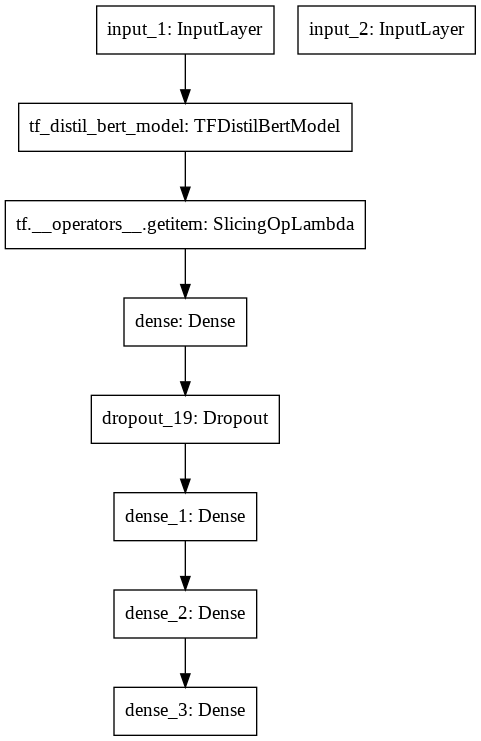

In [59]:
tf.keras.utils.plot_model(model)

In [60]:
# Prepare the model input
input_ids=[]
attention_masks=[]

for sent in sentences:
    dbert_inps=dbert_tokenizer.encode_plus(sent,add_special_tokens = True,max_length =max_len,pad_to_max_length = True,return_attention_mask = True,truncation=True)
    input_ids.append(dbert_inps['input_ids'])
    attention_masks.append(dbert_inps['attention_mask'])

input_ids=np.asarray(input_ids)
attention_masks=np.array(attention_masks)
labels=np.array([t.index(1) for t in targets])

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2155: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [61]:
! ls

combined_data.csv  drive  model.png  sample_data


In [62]:
# Save the model input in the pickle files to use it later without performing the above steps
print('Preparing the pickle file.....')

pickle_inp_path='sample_data/dbert_inp.pkl'
pickle_mask_path='sample_data/dbert_mask.pkl'
pickle_label_path='sample_data/dbert_label.pkl'

pickle.dump((input_ids),open(pickle_inp_path,'wb'))
pickle.dump((attention_masks),open(pickle_mask_path,'wb'))
pickle.dump((labels),open(pickle_label_path,'wb'))


print('Pickle files saved as ',pickle_inp_path,pickle_mask_path,pickle_label_path)

Preparing the pickle file.....
Pickle files saved as  sample_data/dbert_inp.pkl sample_data/dbert_mask.pkl sample_data/dbert_label.pkl


In [63]:
print('Loading the saved pickle files..')

input_ids=pickle.load(open(pickle_inp_path, 'rb'))
attention_masks=pickle.load(open(pickle_mask_path, 'rb'))
labels=pickle.load(open(pickle_label_path, 'rb'))

print('Input shape {} Attention mask shape {} Input label shape {}'.format(input_ids.shape,attention_masks.shape,labels.shape))

Loading the saved pickle files..
Input shape (40310, 128) Attention mask shape (40310, 128) Input label shape (40310,)


In [64]:
target_names = ['happiness', 'sadness', 'worry', 'undertain', 'neutral']

In [65]:
train_inp,val_inp,train_label,val_label,train_mask,val_mask=train_test_split(input_ids,labels,attention_masks,test_size=0.2)

print('Train inp shape {} Val input shape {}\nTrain label shape {} Val label shape {}\nTrain attention mask shape {} Val attention mask shape {}'.format(train_inp.shape,val_inp.shape,train_label.shape,val_label.shape,train_mask.shape,val_mask.shape))

Train inp shape (32248, 128) Val input shape (8062, 128)
Train label shape (32248,) Val label shape (8062,)
Train attention mask shape (32248, 128) Val attention mask shape (8062, 128)


In [66]:
log_dir='dbert_model'
model_save_path='./dbert_model.h5'

callbacks = [tf.keras.callbacks.ModelCheckpoint(filepath=model_save_path,save_weights_only=True,monitor='val_loss',mode='min',save_best_only=True),keras.callbacks.TensorBoard(log_dir=log_dir)]

loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)

model.compile(loss=loss,optimizer=optimizer, metrics=[metric])

In [ ]:
callbacks= [tf.keras.callbacks.ModelCheckpoint(filepath=model_save_path,save_weights_only=True,monitor='val_loss',mode='min',save_best_only=True),keras.callbacks.TensorBoard(log_dir=log_dir)]

In [ ]:
history=model.fit([train_inp,train_mask],train_label,batch_size=16,epochs=5,validation_data=([val_inp,val_mask],val_label),callbacks=callbacks)

Epoch 1/5


2016/2016 [==============================] - ETA: 0s - loss: 9.4280 - accuracy: 0.8813WARNING:tensorflow:The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).


2016/2016 [==============================] - 452s 221ms/step - loss: 9.4270 - accuracy: 0.8813 - val_loss: 4.1778 - val_accuracy: 0.8983
Epoch 2/5
2016/2016 [==============================] - 447s 222ms/step - loss: 3.2293 - accuracy: 0.9337 - val_loss: 1.6478 - val_accuracy: 0.8876
Epoch 3/5
2016/2016 [==============================] - 447s 222ms/step - loss: 1.2124 - accuracy: 0.9572 - val_loss: 0.9626 - val_accuracy: 0.8803
Epoch 4/5
2016/2016 [==============================] - 447s 222ms/step - loss: 0.6103 - accuracy: 0.9690 - val_loss: 0.7607 - val_accuracy: 0.8771
Epoch 5/5
2016/2016 [==============================] - 447s 222ms/step - loss: 0.3868 - accuracy: 0.9753 - val_loss: 0.6940 - val_accuracy: 0.8597


In [ ]:
!zip -r /content/enotions-DistilBert-v1.zip /content/

updating: content/ (stored 0%)
updating: content/.config/ (stored 0%)
updating: content/.config/.last_update_check.json (deflated 25%)
updating: content/.config/active_config (stored 0%)
updating: content/.config/configurations/ (stored 0%)
updating: content/.config/configurations/config_default (deflated 15%)
updating: content/.config/.last_survey_prompt.yaml (stored 0%)
updating: content/.config/config_sentinel (stored 0%)
updating: content/.config/.last_opt_in_prompt.yaml (stored 0%)
updating: content/.config/logs/ (stored 0%)
updating: content/.config/logs/2021.03.01/ (stored 0%)
updating: content/.config/logs/2021.03.01/14.35.09.556851.log (deflated 87%)
updating: content/.config/logs/2021.03.01/14.35.14.752951.log (deflated 54%)
updating: content/.config/logs/2021.03.01/14.34.56.151354.log (deflated 53%)
updating: content/.config/logs/2021.03.01/14.35.29.900487.log (deflated 54%)
updating: content/.config/logs/2021.03.01/14.34.37.071843.log (deflated 92%)
updating: content/.confi

In [ ]:
!ls

dbert_model  dbert_model.h5  enotions-DistilBert-v1.zip  sample_data


# 7- Model evaluation  & prediction

In [ ]:
%load_ext tensorboard
%tensorboard --logdir {'dbert_model'}

In [67]:
%cd /content/drive/MyDrive/Colab Notebooks/IFT-6010-project/

/content/drive/MyDrive/Colab Notebooks/IFT-6010-project


In [68]:
# Load saved model
trained_model = create_model()
trained_model.compile(loss=loss,optimizer=optimizer, metrics=[metric])
trained_model.load_weights('dbert_model.h5')

In [69]:
# F1 score on test dataset
preds = trained_model.predict([val_inp,val_mask],batch_size=16)
pred_labels = preds.argmax(axis=1)
f1 = f1_score(val_label,pred_labels, average='weighted')
print('F1-score of test dataset')
f1

F1-score of test dataset


0.9621737276037259

In [70]:
from sklearn.metrics import accuracy_score
print('Test Accuracy')
accuracy_score(val_label, pred_labels, normalize=True, sample_weight=None)

Test Accuracy


0.9620441577772265

In [71]:
train_preds = trained_model.predict([train_inp,train_mask],batch_size=16)
train_pred_labels = train_preds.argmax(axis=1)
print('Train Accuracy')
accuracy_score(train_label, train_pred_labels, normalize=True, sample_weight=None)

Train Accuracy


0.9626643512775986

In [72]:
print('Classification Report')
print(classification_report(val_label,pred_labels,target_names=target_names))

Classification Report
              precision    recall  f1-score   support

   happiness       0.97      0.93      0.95      1030
     sadness       0.90      0.93      0.91      1031
       worry       0.92      0.94      0.93      1685
   undertain       0.98      1.00      0.99      1419
     neutral       0.99      0.98      0.99      2897

    accuracy                           0.96      8062
   macro avg       0.95      0.95      0.95      8062
weighted avg       0.96      0.96      0.96      8062



In [73]:
target_names = ['happiness', 'sadness', 'worry', 'undertain', 'neutral']

In [74]:
def predict_sentiment(sent):
  # Prepare the model input
  input_id=[]
  attention_mask=[]

  dbert_inps=dbert_tokenizer.encode_plus(sent,add_special_tokens = True,max_length =max_len,pad_to_max_length = True,return_attention_mask = True,truncation=True)
  input_id.append(dbert_inps['input_ids'])
  attention_mask.append(dbert_inps['attention_mask'])

  input_id=np.asarray(input_id)
  attention_mask=np.array(attention_mask)

  example_pred = trained_model.predict([input_id,attention_mask],batch_size=1)
  example_pred_labels = example_pred.argmax(axis=1)

  output = {
      'sentence': sent,
      'predicted_label':target_names[example_pred_labels[0]],
      'confidence_scores': [(target_names[i], example_pred[0][i]) for i in range(0, len(target_names))]
      }
  return output

In [75]:
predict_sentiment('the second assignment of nlp ruined my spring break')

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2155: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


{'confidence_scores': [('happiness', 0.009430327),
  ('sadness', 0.24319355),
  ('worry', 0.72561663),
  ('undertain', 0.0039545335),
  ('neutral', 0.017804943)],
 'predicted_label': 'worry',
 'sentence': 'the second assignment of nlp ruined my spring break'}